## Testing iNaturalist model on North Wycke farm images

In [4]:
# Download pre-trained models
!wget "https://public.boxcloud.com/d/1/b1!5lY-OHLqZW6XObOUzRlLh-pDya1TpGfr2FxgBKBsfwhtDaqeClDwlcxQA-KT2bx4rTwoEXB_onMfDS_VIJzUCtpqwYD_qeZZuGmgdIP3Mz8DWZQPE5QIvm2cbcRCGRzIr3F2rQpO-lg6NlZ-t4lsmDHBiYQnt2dAxzEWlgfV34PBYaTuRwalTN49uyHzaG0U9g8NHUcu6Pb3cxIhLj8oDb9T3J4JU5j7Zi6YrRwF7cpFxNoidGExcOxQpPkndo9Pv9iRqL_iGZDZEAp1n-xOSNM74kBVE6JiCPI3QgTWQkzRgMIWNZ1PIOftcaMfVVs0hu-U9JoxQ066grKLPEbUfGBXPHIHCrUxXjyJg_peCb2IR5OtjmhiNz65u7u-4eY6e3g_3uwmLbS9jsBNKlgY9jJNU05NwsOjU3huPqRb8AA2KqvHsUxb4aPxjbcZ2VEzf_7eODBctrNi7RROKwCQMR_hwGI-BP8iUQ93qznKra6yeBIxJziu1JGsY_rQc_izmuSqKxLqaf83LsYIMINiV4DZHvcI9HpOSYgvexUeM5uC8xSbIrQueE3PT-efXc0ESFu5_cpdEW0Rrb6hOfL2NVoiuqYOtkmfdsbKIV-ddWFzS6eoukwLdHuUWQH8ImtydQv2ASvAia7ph-NI-QQFdu-P3d_k5A3T1rmivl6GIPFlupJ1FkUe16qPE8s3hxevWFNqGd9Hk3Xe4FiPSbQpYqsVtMnlYVxSEefLgJj4gHNeMDFemsSti-jC3Eluf0dMh-PNXMRA-6ylFYWVuEmAG9uPTidwcIBCM9nM1RYgwTdRa7UVcL0RpVG2isCkrPnP2t0caayjGdP1HQqpGA6y3PImO5TerXPCyhd-2sICN_G_Ny0YMgJh7mhH1ajXbioMAlubI3C9bzUBLl78-DhJ1y0B-FLgD5kYFh6crk9rck22b2m95DN4G1djdZkBZdkRQKzTaGowtA16yCCmxZz1l8YF-ywPydRMLRKBVWaWnw7c5T2WWMoE4cr-5amCAWSvLMJDtwG1Lrmt1BTKMUrR1Z_JWxWzlPseUvSt1zlURu0NoLpJ8ihhebHKAvPFt2a0ekKXCUKT4_6YZK3RWwVKoXea71cuvXVjzgE5SudzpTWiF7EX5uJbNUz-V_vRKKOFpgV5PLWrCxBhH9sol87KKWv-igKOHhtVUSUuD5vH43egpZ2XRnGqJVls7pklSYvdmBU9H81_o0Hol93bv_lu5877RaOBD_AKnCnX6Kb39tyP50bCeWh3YfcnWwRQ8x5CIVWOxnHE0-fFwXxiHP4bvB_mjgzUr3_OyjRrhDo./download" -O cvpr21_newt_pretrained_models.tar.gz

--2024-07-04 13:52:53--  https://public.boxcloud.com/d/1/b1!5lY-OHLqZW6XObOUzRlLh-pDya1TpGfr2FxgBKBsfwhtDaqeClDwlcxQA-KT2bx4rTwoEXB_onMfDS_VIJzUCtpqwYD_qeZZuGmgdIP3Mz8DWZQPE5QIvm2cbcRCGRzIr3F2rQpO-lg6NlZ-t4lsmDHBiYQnt2dAxzEWlgfV34PBYaTuRwalTN49uyHzaG0U9g8NHUcu6Pb3cxIhLj8oDb9T3J4JU5j7Zi6YrRwF7cpFxNoidGExcOxQpPkndo9Pv9iRqL_iGZDZEAp1n-xOSNM74kBVE6JiCPI3QgTWQkzRgMIWNZ1PIOftcaMfVVs0hu-U9JoxQ066grKLPEbUfGBXPHIHCrUxXjyJg_peCb2IR5OtjmhiNz65u7u-4eY6e3g_3uwmLbS9jsBNKlgY9jJNU05NwsOjU3huPqRb8AA2KqvHsUxb4aPxjbcZ2VEzf_7eODBctrNi7RROKwCQMR_hwGI-BP8iUQ93qznKra6yeBIxJziu1JGsY_rQc_izmuSqKxLqaf83LsYIMINiV4DZHvcI9HpOSYgvexUeM5uC8xSbIrQueE3PT-efXc0ESFu5_cpdEW0Rrb6hOfL2NVoiuqYOtkmfdsbKIV-ddWFzS6eoukwLdHuUWQH8ImtydQv2ASvAia7ph-NI-QQFdu-P3d_k5A3T1rmivl6GIPFlupJ1FkUe16qPE8s3hxevWFNqGd9Hk3Xe4FiPSbQpYqsVtMnlYVxSEefLgJj4gHNeMDFemsSti-jC3Eluf0dMh-PNXMRA-6ylFYWVuEmAG9uPTidwcIBCM9nM1RYgwTdRa7UVcL0RpVG2isCkrPnP2t0caayjGdP1HQqpGA6y3PImO5TerXPCyhd-2sICN_G_Ny0YMgJh7mhH1ajXbioMAlubI3C9bzUBLl78-DhJ1y0B-FLgD5kYFh6crk9rck22

In [5]:
# Unzip models
!tar -xzvf cvpr21_newt_pretrained_models.tar.gz

cvpr21_newt_pretrained_models/
cvpr21_newt_pretrained_models/pt/
cvpr21_newt_pretrained_models/pt/inat2021_mini_swav_ckp-199.pth
cvpr21_newt_pretrained_models/pt/inat2021_moco_v2_mini_1000_ep.pth.tar
cvpr21_newt_pretrained_models/pt/inat2021_supervised_large_from_scratch.pth.tar
cvpr21_newt_pretrained_models/pt/inat2021_supervised_mini.pth.tar
cvpr21_newt_pretrained_models/pt/imagenet_swav_800ep_pretrain.pth.tar
cvpr21_newt_pretrained_models/pt/inat2018_supervised.pth.tar
cvpr21_newt_pretrained_models/pt/inat2021_supervised_mini_from_scratch.pth.tar
cvpr21_newt_pretrained_models/pt/inat2021_supervised_large.pth.tar
cvpr21_newt_pretrained_models/pt/imagenet_moco_v2_800ep_pretrain.pth.tar
cvpr21_newt_pretrained_models/pt/inat2021_swav_mini_1000_ep.pth
cvpr21_newt_pretrained_models/tf/
cvpr21_newt_pretrained_models/tf/inat2021_mini/
cvpr21_newt_pretrained_models/tf/inat2021_mini/simclr_v2/
cvpr21_newt_pretrained_models/tf/inat2021_mini/simclr_v2/488282_resnet50_simclr_v2_inat20_mini_no_to

In [14]:
# Load target model (inat2021_supervised_large)

import torch
from torchvision.models import resnet50

model = resnet50()
num_classes = 10000 # 10,000 classes including all species
model.fc = torch.nn.Linear(in_features=2048, out_features=num_classes)

weights_file_path = "cvpr21_newt_pretrained_models/pt/inat2021_supervised_large.pth.tar"
checkpoint = torch.load(weights_file_path, map_location=torch.device('cpu'))
model.load_state_dict(checkpoint['state_dict'])


<All keys matched successfully>

In [12]:
from torchsummary import summary

summary(model, input_size=(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

### Perform inference with iNaturalist fully supervised model

In [7]:
# Download Maxwell example image from roboflow (downloaded on 4/7/24)
!wget https://source.roboflow.com/lIFuTMYTdDcb4wAHWf9A4cSE6kn1/flr1xdwqfVuHgQOYVeHw/original.jpg -O grassclover.jpg

--2024-07-04 13:56:41--  https://source.roboflow.com/lIFuTMYTdDcb4wAHWf9A4cSE6kn1/flr1xdwqfVuHgQOYVeHw/original.jpg
Resolving source.roboflow.com (source.roboflow.com)... 35.190.21.63
Connecting to source.roboflow.com (source.roboflow.com)|35.190.21.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17176116 (16M) [image/jpeg]
Saving to: ‘grassclover.jpg’

grassclover.jpg     100%[===================>]  16.38M  34.8MB/s    in 0.5s    

2024-07-04 13:56:41 (34.8 MB/s) - ‘grassclover.jpg’ saved [17176116/17176116]



In [8]:
# Define image cropping function

from PIL import Image

def crop_to_square(image_path, output_path):
    # Open the image
    with Image.open(image_path) as img:
        # Get the dimensions of the image
        width, height = img.size

        # Calculate the coordinates for the square crop
        min_dimension = min(width, height)
        left = (width - min_dimension) / 2
        top = (height - min_dimension) / 2
        right = (width + min_dimension) / 2
        bottom = (height + min_dimension) / 2

        # Crop the image
        img_cropped = img.crop((left, top, right, bottom))

        # Save or display the cropped image
        img_cropped.save(output_path)

In [9]:
# Crop image

cropped_image = crop_to_square("grassclover.jpg", "cropped_grassclover.jpg")

In [11]:
# Transform input image

import torchvision.transforms as transforms
import numpy as np

filename = "cropped_grassclover.jpg"

# transforming input image
input_image = Image.open(filename)

preprocess = transforms.Compose([
          transforms.Resize(256),
          transforms.CenterCrop(224),
          transforms.ToTensor(),
          transforms.Normalize(mean=[0.485, 0.456, 0.406],
                               std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)# create a mini-batch as expected by the model
input_batch = input_tensor.unsqueeze(0)
print(f"Image tensor dimensions: {input_tensor.shape}")

Image tensor dimensions: torch.Size([3, 224, 224])


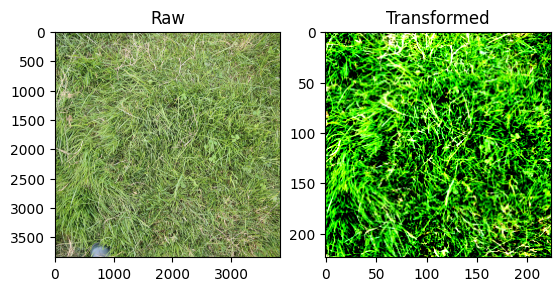

In [15]:
# Show example input image (before/after transform)
import matplotlib.pyplot as plt

input_tensor_np = input_tensor.numpy()
input_tensor_np_flipped = np.transpose(input_tensor_np, (1, 2, 0))

fig, axs = plt.subplots(1, 2)

axs[0].imshow(input_image)
axs[0].set_title("Raw")

axs[1].imshow(input_tensor_np_flipped)
axs[1].set_title("Transformed")

plt.show()

In [16]:
# Perform inference on processed image

model.eval()
with torch.no_grad():
   output = model(input_batch)

probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities.shape)

torch.Size([10000])


In [17]:
# Load class IDs
!wget "https://ml-inat-competition-datasets.s3.amazonaws.com/2021/val.json.tar.gz"
!tar -xzf val.json.tar.gz

import json

with open("val.json", "r") as json_file:
  metadata_dict = json.load(json_file)

id_species_mapping = {int(item['id']): item['name'] for item in metadata_dict['categories']}

--2024-07-04 13:59:59--  https://ml-inat-competition-datasets.s3.amazonaws.com/2021/val.json.tar.gz
Resolving ml-inat-competition-datasets.s3.amazonaws.com (ml-inat-competition-datasets.s3.amazonaws.com)... 52.219.177.100, 52.219.111.92, 16.12.65.76, ...
Connecting to ml-inat-competition-datasets.s3.amazonaws.com (ml-inat-competition-datasets.s3.amazonaws.com)|52.219.177.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9797665 (9.3M) [application/gzip]
Saving to: ‘val.json.tar.gz’

val.json.tar.gz     100%[===================>]   9.34M  16.6MB/s    in 0.6s    

2024-07-04 14:00:00 (16.6 MB/s) - ‘val.json.tar.gz’ saved [9797665/9797665]



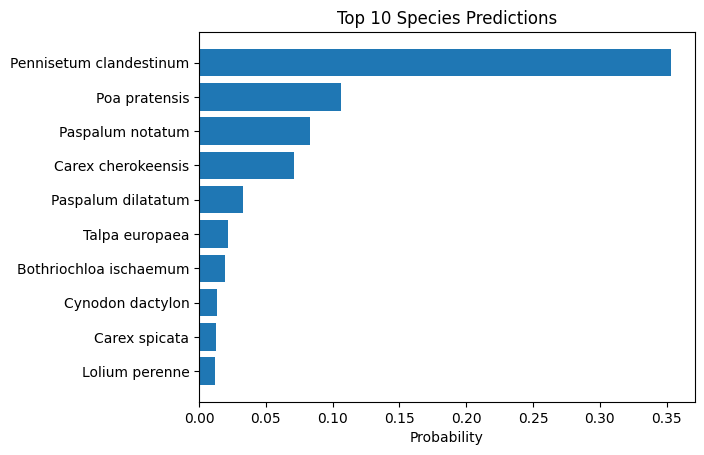

In [19]:
# Obtain values of the top 10 predictions and plot

top_values, top_indices = torch.topk(probabilities, k=10)

top_values_np = top_values.numpy()
top_indices_np = top_indices.numpy()

fig, ax = plt.subplots()

ax.barh(range(len(top_indices_np)), top_values_np, align='center')
ax.set_yticks(range(len(top_indices_np)))
ax.set_yticklabels([id_species_mapping[index] for index in top_indices_np])
ax.invert_yaxis()  # Invert y-axis to have the highest value at the top

ax.set_xlabel('Probability')
ax.set_title('Top 10 Species Predictions')

plt.show()

In [ ]:
metadata_dict['categories'][-100]

In [21]:
# Replot with plant family labels

id_species_mapping = {
    int(item['id']): item['family'] if item['kingdom'] == 'Plantae' else 'non_plant'
    for item in metadata_dict['categories']
}

In [ ]:
species_names = [id_ClassName_mapping[index] for index in top_indices_np]
print(species_names)